深度神经网络
- 感知器
- 单层神经网络
- 深度神经网络
- 向量量化器
- 为序列数据分析创建一个递归神经网络
- 在光学字符识别数据库中将字符可视化
- 用神经网络创建一个光学字符识别器
- ------------------------

神经网络被用于从数据中识别隐藏的模式。正如所有的学习算法，神经网络处理的是数字。现实世界中任何包含图像、文字、传感器的任务，必须将其转化成数值形式，然后输入到一个神经网络中
- 神经网络可以做分类、聚类、生成以及其他相关的任务
- 神经网络由一层层神经元组成。输入层对应我们提供的数据，输出层包含了我们期望的输出结果。输入层和输出层之间的层统称为隐藏层。一般设计的神经网络包含多个隐藏层，自我训练能够获得更大的精度
- 深度神经网络就是包含了多个隐藏层的神经网络，更多参考： http://pages.cs.wisc.edu/~bolo/shipyard/neural/local.html
- 本例将使用NeuroLab库，安装指导： https://pythonhosted.org/neurolab/install.html
- ------------------------
关于单层感知机，其结构与逻辑回归（LR）是一致的，但是效果与逻辑回归相比较差。由多个这样的单层感知机结构组合在一起可以组成多层感知机，或者是深度神经网络结构。单层感知机或是逻辑回归等这些神经网络虽然结构十分简单，却是其它更为复杂的神经网络的基础，在学习时需要掌握数据在模型中的计算过程、损失函数构造方法、利用损失函数求梯度并利用梯度下降等优化方法更新参数方法。
- ------------------------

感知机
- 一个单独的神经元，负责执行所有的计算，奠定了构建复杂神经网络的基础
- 可将多个输入用不同的权重系数融合起来，并加上偏差值来计算输出
- neurolab模块支持的网络类型：
    - 单层感知机(single layer perceptron)
    - 多层前馈感知机(Multilayer feed forward perceptron)
    - 竞争层(Kohonen Layer)
    - 学习向量量化(Learning Vector Quantization)
    - Elman循环网络(Elman recurrent network)
    - Hopfield循环网络(Hopfield recurrent network)
    - 卷边循环网络(Hemming recurrent network)
- net = newp(PR，S，TF，LF)
    - PR:PR为一个R2的矩阵，由R组输入向量中的最大值和最小值组成 R2 * [min,max]
    - S:表示神经元的个数
        - 独立神经元(单层感知机) S=1；
        - 如果单个隐藏层3个神经元，输出层1个神经元，S=[3,1]
        - 如果两个隐藏层各有10个神经元，输出层1个神经元，S=[10,10,1]
    - TF:激活函数的设置
    - LF:学习修正函数的设置
- error = perceptron.train(input_data, output, epochs=50, show=15, lr=0.01)
    - epochs：表示迭代训练的次数
    - show：表示终端输出的频率
    - lr：表示学习率

The goal of learning is reached


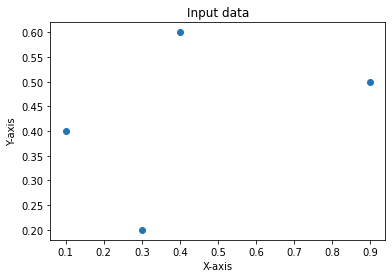

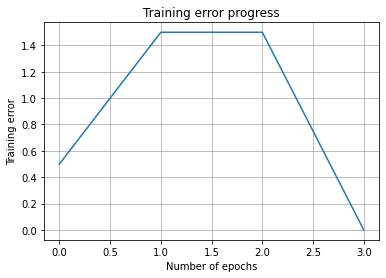

In [8]:
%run perceptron.py

创建一个单层神经网络
- 单层神经网络会有一个输入层、一个隐藏层和一个输出层
- single_layer_net = nl.net.newp([[x_min, x_max], [y_min, y_max]], 2)


The maximum number of train epochs is reached


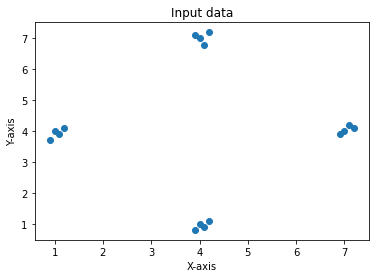

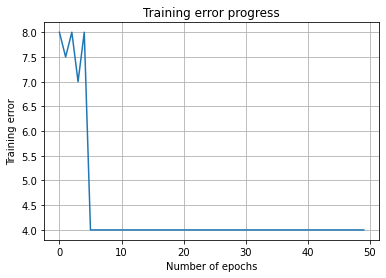

[0.3,4.5] predict result → [[0. 0.]]
[4.5,0.5] predict result → [[1. 0.]]
[4.3,8] predict result → [[1. 1.]]


In [10]:
%run single_layer.py

创建一个深度神经网络
- 深度神经网络由一个输入层、多个隐藏层和一个输出层组成
- multilayer_net = nl.net.newff([[min_value, max_value]], [10, 10, 1])
- multilayer_net.trainf = nl.train.train_gd
- error = multilayer_net.train(data, labels, epochs=800, show=100, goal=0.01)

- x_norm = np.linalg.norm(x,ord,axis,keepdims). 
    - x - 表示矩阵，也可是一维
    - ord - 范数类型
        - 1：列和最大值
        - 2：求特征值，然后求最大特征值的算数平方根
        - ∞：行和的最大值
    - axis - 处理类型
        - 1：行向量处理
        - 2：列向量处理
    - keepdims
        - True：保持矩阵的二维特性
        - False：不保持二维特性
- (https://blog.csdn.net/hqh131360239/article/details/79061535)

Epoch: 100; Error: 3.588251990743832;
Epoch: 200; Error: 1.1254198971414733;
Epoch: 300; Error: 0.12336656043220565;
Epoch: 400; Error: 0.01920407971373845;
The goal of learning is reached


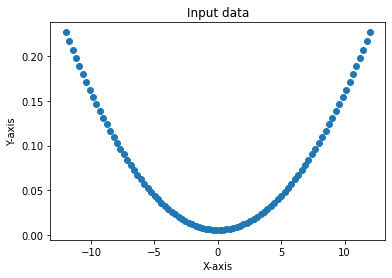

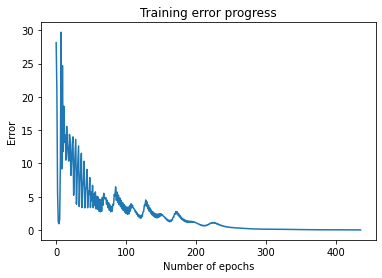

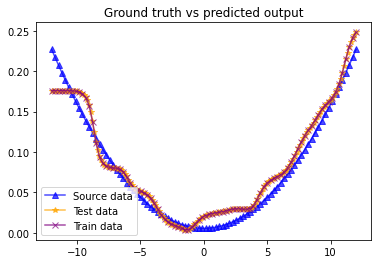

In [49]:
%run deep_neural_network.py

创建一个向量量化器
- 用神经网络做向量量化
- 向量量化是N维空间的"四舍五入"，广泛用于各个领域，NLP,CV,ML等
- nl.net.newlvq(nl.tool.minmax(data), 10, [0.25, 0.25, 0.25, 0.25])

Tips:
- 遇到报错信息：slice indices must be integers or None or have an __index__ method
- 根据错误提示，把layer_out.np['w'][n][st:i].fill(1.0)改成layer_out.np['w'][n][int(st):int(i)].fill(1.0)后，bug解决
- ~\AppData\Local\Programs\Python\Python310\Lib\site-packages\neurolab\net.py - 源文件bug
- 参考：https://blog.csdn.net/qq_35991059/article/details/82667936

Epoch: 100; Error: 0.0;
The maximum number of train epochs is reached


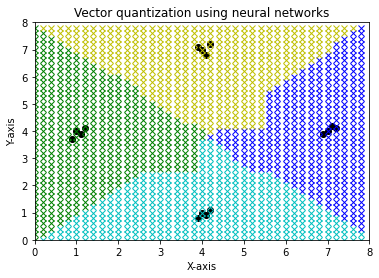

In [3]:
%run vector_quantization.py

为序列数据分析创建一个递归神经网络
- 递归神经网络能较好地分析序列和时间序列数据，详见：www.wildml.com/2015/09/recurrent-neural-networks-tutorial-part-1-introduction-to-rnns
- 对于序列数据，不能简单地扩展通用模型。数据的时序相关性非常关键，建模时要考虑到这一点
- net = nl.net.newelm([[-2, 2]], [10, 1], [nl.trans.TanSig(), nl.trans.PureLin()])
- net = newelm(P,T, [S1…SN] , {TF1…TFN},BTF,BLF,PF,IPF,OPF)
    - P , RQ1矩阵，包含Q1个长度为R的典型输入向量
    - T , SNQ2矩阵，包含Q2个长度为SN的典型目标向量，SN决定了输出向量的长度
    - Si，N-1个隐含层包含的神经元个数，默认值为[]
    - TFi，第i层传递函数，用字符串表示。对于输出层，默认值为‘purelin’，对于隐含层，默认值为‘tansig’
    - BTF，反向传播网络的训练函数，默认值为‘traingdx’，可取值还有‘traingd’、‘traingdm’、‘traingda’
    - BLF，反向传播权值/阙值学习函数，默认值为‘learndm’，可取值还有‘’learngd’等函数
    - PF，性能函数，默认值为‘mse’，可取值还有‘msereg’
    - IPR, 输入处理函数，默认值为‘{‘fixunknowns’，‘removeconstantrows’，‘mapminmax’}’
    - OPF,输处处理函数，默认值为‘{‘removeconstantrows’，‘mapminmax’}’

Epoch: 100; Error: 1.1535026265440715;
Epoch: 200; Error: 0.055818122869582286;
Epoch: 300; Error: 0.02219185485620677;
Epoch: 400; Error: 0.009929438128995664;
The goal of learning is reached


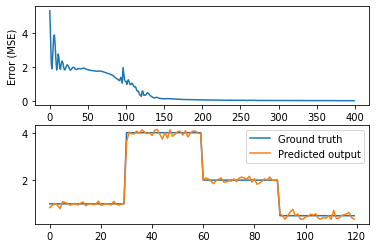

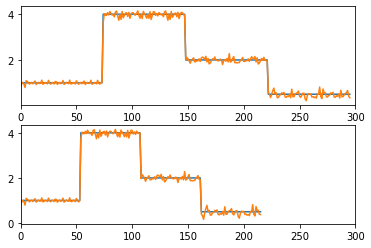

In [4]:
%run recurrent_network.py

光学字符识别
- 识别图像中手写字符的过程
- 数据集：http://ai.stanford.edu/~btaskar/ocr/

In [5]:
%run visualize_characters.py

用神经网络创建一个光学字符识别器

Epoch: 100; Error: 5.97192148813577;
Epoch: 200; Error: 1.3245793161534014;
Epoch: 300; Error: 0.9028137451204467;
Epoch: 400; Error: 0.46001341461426687;
Epoch: 500; Error: 0.5072065693153378;
Epoch: 600; Error: 0.3922573345817706;
Epoch: 700; Error: 0.3414891294623752;
Epoch: 800; Error: 0.26681926266933925;
Epoch: 900; Error: 0.16564685412532154;
Epoch: 1000; Error: 0.18536784236337953;
Epoch: 1100; Error: 0.36031722360456386;
Epoch: 1200; Error: 0.24866677690102293;
Epoch: 1300; Error: 0.2214718018422024;
Epoch: 1400; Error: 0.21709304356127893;
Epoch: 1500; Error: 0.18818489054481638;
Epoch: 1600; Error: 0.1695875084013174;
Epoch: 1700; Error: 0.15913271844768911;
Epoch: 1800; Error: 0.15259752193793655;
Epoch: 1900; Error: 0.14785846013235757;
Epoch: 2000; Error: 0.1439992695066894;
Epoch: 2100; Error: 0.1407236088353571;
Epoch: 2200; Error: 0.13790498562736728;
Epoch: 2300; Error: 0.13535898203622543;
Epoch: 2400; Error: 0.13287952232696848;
Epoch: 2500; Error: 0.130440539014217

Epoch: 19900; Error: 0.025348017322447177;
Epoch: 20000; Error: 0.02489516070007565;
The maximum number of train epochs is reached

Testing on unknown data:

Original: o
Predicted: o

Original: m
Predicted: m


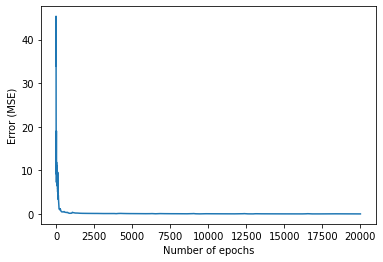

In [5]:
%run ocr.py